In [1]:
datasets = ["classic4","Dmoz_Computers","Dmoz_Health","Dmoz_Science","Dmoz_Sports","NSF","re8","review_polarity","SyskillWebert","webkb_parsed","Industry_Sector"] # CSTR isd includesd separetely

In [2]:
input_path ='/content/drive/MyDrive/Resultados/COARSENING/'
output_path ='/content/drive/MyDrive/Resultados/COARSENING/tabelas/'

# Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import json

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loads

## Count function

In [5]:
def count_ED(path,model_name):
    with open(path) as f:
        data = json.load(f)
        df_list[iteration].at[model_name+"_source_vertices_D", str(rotulated)] = data["source_vertices"][0]
        df_list[iteration].at[model_name+"_source_vertices_E", str(rotulated)] = data["source_vertices"][1]
        df_list[iteration].at[model_name+"_source_vcount", str(rotulated)] = data["source_vcount"]
        df_list[iteration].at[model_name+"_source_ecount", str(rotulated)] = data["source_ecount"]
        df_list[iteration].at[model_name+"_vertices_D", str(rotulated)] = data["vertices"][0]
        df_list[iteration].at[model_name+"_vertices_E", str(rotulated)] = data["vertices"][1]
        df_list[iteration].at[model_name+"_vcount", str(rotulated)] = data["vcount"]
        df_list[iteration].at[model_name+"_ecount", str(rotulated)] = data["ecount"]

# Read and save confs

In [ ]:
df_list = []
for i in range(10):
    df_list.append(pd.DataFrame(columns=['1','5','10','20','30']))

In [ ]:
for dataset_name in datasets:
    for keyphrase in ["keyphrase2","keyphrase3","keyphrase23"]:
        for rotulated in [1,5,10,20,30]:
            for iteration in range(10):
                count_ED(input_path+"CONF/"+dataset_name+"_"+keyphrase+"_"+str(rotulated)+'_'+str(iteration)+".conf", dataset_name+"_"+keyphrase)
                #os.remove(input_path+"CONFS/"+dataset_name+"_"+keyphrase+"_"+str(rotulated)+'_'+str(iteration)+".conf")

In [ ]:
dataset_name="CSTR"
for keyphrase in ["keyphrase2","keyphrase3","keyphrase23"]:
    for rotulated in [1,5,10,20]:
        for iteration in range(10):
            count_ED(input_path+"CONF/"+dataset_name+"_"+keyphrase+"_"+str(rotulated)+'_'+str(iteration)+".conf", dataset_name+"_"+keyphrase)
            #os.remove(input_path+"CONFS/"+dataset_name+"_"+keyphrase+"_"+str(rotulated)+'_'+str(iteration)+".conf")

In [ ]:
# Saving coarsening data dataframes
for i in range(10):
    df_list[i].to_pickle(input_path+"dataframes/"+str(i)+"/df_coarse.pkl") # coarsening node and edges

In [ ]:
df_list[0]

,1,5,10,20,30
classic4_keyphrase2_source_vertices_D,7095,7095,7095,7095,7095
classic4_keyphrase2_source_vertices_E,25043,25043,25043,25043,25043
classic4_keyphrase2_source_vcount,32138,32138,32138,32138,32138
classic4_keyphrase2_source_ecount,376581,375492,374658,371572,369374
classic4_keyphrase2_vertices_D,3547,3547,3547,3547,3547
...,...,...,...,...,...
CSTR_keyphrase23_source_ecount,18579,17761,16233,14066,NaN
CSTR_keyphrase23_vertices_D,149,149,149,149,NaN
CSTR_keyphrase23_vertices_E,696,696,696,696,NaN
CSTR_keyphrase23_vcount,845,845,845,845,NaN


# Mean e std

In [ ]:
mean_df_coarse= pd.concat([df_list[0],df_list[1],df_list[2],df_list[3],df_list[4],df_list[5],df_list[6],df_list[7],df_list[8],df_list[9]]).groupby(level=0).mean()
std_df_coarse= pd.concat([df_list[0],df_list[1],df_list[2],df_list[3],df_list[4],df_list[5],df_list[6],df_list[7],df_list[8],df_list[9]]).groupby(level=0).std()

In [ ]:
# Saving dataframes
mean_df_coarse.to_csv(output_path+"/mean/df_coarse.csv",index=True, index_label='Dataframe') # coarsening node and edges

std_df_coarse.to_csv(output_path+"/std/df_coarse.csv",index=True, index_label='Dataframe') # coarsening node and edges

# Ajustanto para artigo

## Lê

In [ ]:
mean_df_coarse = pd.read_csv(input_path+"tabelas/mean/df_coarse.csv", index_col='Dataframe')  # acuracia

In [ ]:
datasets = ["classic4","CSTR","Dmoz_Computers","Dmoz_Health","Dmoz_Science","Dmoz_Sports","Industry_Sector","NSF","re8","review_polarity","SyskillWebert","webkb_parsed"]

In [ ]:
mean_df_coarse['media'] = mean_df_coarse.mean(axis=1)

## Transforma

In [ ]:
df = pd.DataFrame(index=datasets,columns=["source_vcount","source_ecount","vcount","ecount"])
#for i, row in mean_df_coarse.iterrows():
for dataset_name in datasets:
    for keyphrase in ["keyphrase2","keyphrase3","keyphrase23"]:
        df.at[dataset_name+"_"+keyphrase, "source_vcount"] = mean_df_coarse.at[dataset_name+"_"+keyphrase+"_source_vcount","media"]
        df.at[dataset_name+"_"+keyphrase, "source_ecount"] = mean_df_coarse.at[dataset_name+"_"+keyphrase+"_source_ecount","media"]
        df.at[dataset_name+"_"+keyphrase, "vcount"] = mean_df_coarse.at[dataset_name+"_"+keyphrase+"_vcount","media"]
        df.at[dataset_name+"_"+keyphrase, "ecount"] = mean_df_coarse.at[dataset_name+"_"+keyphrase+"_ecount","media"]

        df.at[dataset_name+"_"+keyphrase, "vcount"] = mean_df_coarse.at[dataset_name+"_"+keyphrase+"_vcount","media"]
        df.at[dataset_name+"_"+keyphrase, "ecount"] = mean_df_coarse.at[dataset_name+"_"+keyphrase+"_ecount","media"]

In [ ]:
df=df.drop(datasets, axis=0)

In [ ]:
df["Node Reduction"] = (df['vcount'] / df['source_vcount']) *100
df["Edge Reduction"] = (df['ecount'] / df['source_ecount']) *100

df = df[["source_vcount","vcount","Node Reduction","source_ecount","ecount","Edge Reduction"]]

#df = df.rename(columns={"source_vcount": "Nodes Count", "vcount":"Coarsened Nodes Count", "source_ecount":"Edges Count", "ecount":"Coarsened Edges Count"})

df = df.rename(columns={"source_vcount": "Total Nodes", "vcount":"Coarsened Nodes", "source_ecount":"Total Edges", "ecount":"Coarsened Edges"})

df.loc['Media Total'] = df.mean()

df = df.astype(int)

In [ ]:
df["Node Reduction"] = df["Node Reduction"].astype(str) + "%"
df["Edge Reduction"] = df["Edge Reduction"].astype(str) + "%"

In [ ]:
df

,Total Nodes,Coarsened Nodes,Node Reduction,Total Edges,Coarsened Edges,Edge Reduction
classic4_keyphrase2,32138,16068,49%,373512,123585,33%
classic4_keyphrase3,36591,18295,49%,373447,153769,41%
classic4_keyphrase23,37305,18652,49%,372682,159707,42%
CSTR_keyphrase2,1613,806,49%,16517,4395,26%
CSTR_keyphrase3,1721,860,49%,16666,4393,26%
CSTR_keyphrase23,1691,845,49%,16529,4318,26%
Dmoz_Computers_keyphrase2,48455,25130,51%,217578,149053,68%
Dmoz_Computers_keyphrase3,54804,28766,52%,211293,144506,68%
Dmoz_Computers_keyphrase23,54778,28629,52%,206577,136289,65%
Dmoz_Health_keyphrase2,31612,16135,51%,160990,99999,62%


In [ ]:
def ajust_table(df):
    keyphrase_dit = {"keyphrase2":"[2]","keyphrase23":"[2,3]","keyphrase3":"[3]"}
    for i in df.index:
        split = i.split('_')
        if len(split)==2:
            df.at[i,"Dataset"] = split[0]
            df.at[i,"Keyphrases"] = keyphrase_dit[split[1]]
        if len(split)==3:
            df.at[i,"Dataset"] = split[0]+'_'+split[1]
            df.at[i,"Keyphrases"] = keyphrase_dit[split[2]]
    df = df[['Dataset',	'Keyphrases',	'Total Nodes', 'Coarsened Nodes',	'Node Reduction',	'Total Edges',	'Coarsened Edges',	'Edge Reduction']]
    return df

In [ ]:
df_1 = ajust_table(df)

In [ ]:
df_1.reset_index(drop=True, inplace=True)
df_1

,Dataset,Keyphrases,Total Nodes,Coarsened Nodes,Node Reduction,Total Edges,Coarsened Edges,Edge Reduction
0,classic4,[2],32138,16068,49%,373512,123585,33%
1,classic4,[3],36591,18295,49%,373447,153769,41%
2,classic4,"[2,3]",37305,18652,49%,372682,159707,42%
3,CSTR,[2],1613,806,49%,16517,4395,26%
4,CSTR,[3],1721,860,49%,16666,4393,26%
5,CSTR,"[2,3]",1691,845,49%,16529,4318,26%
6,Dmoz_Computers,[2],48455,25130,51%,217578,149053,68%
7,Dmoz_Computers,[3],54804,28766,52%,211293,144506,68%
8,Dmoz_Computers,"[2,3]",54778,28629,52%,206577,136289,65%
9,Dmoz_Health,[2],31612,16135,51%,160990,99999,62%


# Coarse vs trad

In [30]:
coarse_f1 = pd.read_csv(input_path+"tabelas/mean/df_f1.csv", index_col='Dataframe')  # f1

trad_f1 = pd.read_csv("/content/drive/MyDrive/Resultados/TRAD/tabelas/mean/df_f1.csv", index_col='Dataframe')  # f1}

In [31]:
trad_f1

,1,5,10,20,30
Dataframe,,,,,
CSTR_keyphrase23_GAT,0.580277,0.811999,0.836131,0.811409,NaN
CSTR_keyphrase23_GCN,0.594979,0.794995,0.819313,0.801470,NaN
CSTR_keyphrase2_GAT,0.535783,0.824261,0.847399,0.816010,NaN
CSTR_keyphrase2_GCN,0.585179,0.796397,0.806770,0.803067,NaN
CSTR_keyphrase3_GAT,0.543135,0.828019,0.833142,0.811387,NaN
...,...,...,...,...,...
webkb_parsed_keyphrase23_GCN,0.115618,0.253510,0.269867,0.222162,0.318071
webkb_parsed_keyphrase2_GAT,0.169443,0.314226,0.374042,0.413629,0.440611
webkb_parsed_keyphrase2_GCN,0.134415,0.262501,0.242717,0.273766,0.221325


In [32]:
trad_f1['media'] = trad_f1.mean(axis=1)

coarse_f1['media'] = coarse_f1.mean(axis=1)

In [33]:
def ajust_table(df):
    keyphrase_dit = {"keyphrase2":"[2]","keyphrase23":"[2,3]","keyphrase3":"[3]"}
    for i in df.index:
        split = i.split('_')
        if len(split)==3:
            df.at[i,"Dataset"] = split[0]
            df.at[i,"Keyphrases"] = keyphrase_dit[split[1]]
            df.at[i,"GNN Model"] = split[2]
        if len(split)==4:
            df.at[i,"Dataset"] = split[0]+'_'+split[1]
            df.at[i,"Keyphrases"] = keyphrase_dit[split[2]]
            df.at[i,"GNN Model"] = split[3]
    df = df[['Dataset',	'Keyphrases',	'GNN Model', '1',	'5',	'10',	'20',	'30',	'media']]
    return df

In [34]:
trad_f1 = ajust_table(trad_f1)

trad_f1 = trad_f1.groupby('Dataset').agg(({'media': 'mean'}))

trad_f1.loc['Media Total'] = trad_f1.mean()

trad_f1.rename(columns={"media": "Traditional"},inplace=True)

coarse_f1 = ajust_table(coarse_f1)

coarse_f1 = coarse_f1.groupby('Dataset').agg(({'media': 'mean'}))

coarse_f1.loc['Media Total'] = coarse_f1.mean()

coarse_f1.rename(columns={"media": "Coarsening"},inplace=True)

In [35]:
df_comp = pd.concat([trad_f1,coarse_f1], axis=1)
df_comp['F1-score reduction'] = round(((df_comp['Coarsening'] / df_comp['Traditional']) *100),2)

df_comp['Traditional'] = round(df_comp['Traditional'],4)
df_comp['Coarsening'] = round(df_comp['Coarsening'],4)
df_comp['F1-score reduction'] = df_comp['F1-score reduction'].astype(str) + "%"
df_comp = df_comp[['Coarsening','Traditional','F1-score reduction']]

In [36]:
df_comp

,Coarsening,Traditional,F1-score reduction
Dataset,,,
CSTR,0.5954,0.7533,79.04%
Dmoz_Computers,0.4452,0.4887,91.11%
Dmoz_Health,0.6155,0.6845,89.92%
Dmoz_Science,0.5413,0.5874,92.16%
Dmoz_Sports,0.5883,0.6821,86.25%
Industry_Sector,0.2147,0.2928,73.35%
NSF,0.6884,0.7123,96.64%
SyskillWebert,0.4185,0.8007,52.26%
classic4,0.7833,0.8711,89.92%


# Coarse vs trad and GAT vs GCN

In [43]:
coarse_f1 = pd.read_csv(input_path+"tabelas/mean/df_f1.csv", index_col='Dataframe')  # f1

trad_f1 = pd.read_csv("/content/drive/MyDrive/Resultados/TRAD/tabelas/mean/df_f1.csv", index_col='Dataframe')  # f1}

In [44]:
trad_f1

,1,5,10,20,30
Dataframe,,,,,
CSTR_keyphrase23_GAT,0.580277,0.811999,0.836131,0.811409,NaN
CSTR_keyphrase23_GCN,0.594979,0.794995,0.819313,0.801470,NaN
CSTR_keyphrase2_GAT,0.535783,0.824261,0.847399,0.816010,NaN
CSTR_keyphrase2_GCN,0.585179,0.796397,0.806770,0.803067,NaN
CSTR_keyphrase3_GAT,0.543135,0.828019,0.833142,0.811387,NaN
...,...,...,...,...,...
webkb_parsed_keyphrase23_GCN,0.115618,0.253510,0.269867,0.222162,0.318071
webkb_parsed_keyphrase2_GAT,0.169443,0.314226,0.374042,0.413629,0.440611
webkb_parsed_keyphrase2_GCN,0.134415,0.262501,0.242717,0.273766,0.221325


In [45]:
trad_f1['media'] = trad_f1.mean(axis=1)

coarse_f1['media'] = coarse_f1.mean(axis=1)

In [46]:
def ajust_table(df):
    keyphrase_dit = {"keyphrase2":"[2]","keyphrase23":"[2,3]","keyphrase3":"[3]"}
    for i in df.index:
        split = i.split('_')
        if len(split)==3:
            df.at[i,"Dataset"] = split[0]
            df.at[i,"Keyphrases"] = keyphrase_dit[split[1]]
            df.at[i,"GNN Model"] = split[2]
        if len(split)==4:
            df.at[i,"Dataset"] = split[0]+'_'+split[1]
            df.at[i,"Keyphrases"] = keyphrase_dit[split[2]]
            df.at[i,"GNN Model"] = split[3]
    df = df[['Dataset',	'Keyphrases',	'GNN Model', '1',	'5',	'10',	'20',	'30',	'media']]
    return df

In [47]:
# teste = trad_f1.copy()
# #teste['Dataset'] = teste["Dataset"] + "_" + teste["GNN Model"]
# teste = teste.pivot_table(index='Dataset', columns='GNN Model', values='media')
# teste.loc['Media Total'] = teste.mean()
# teste.rename(columns={"GAT": "Traditional_GAT", "GCN": "Traditional_GCN"},inplace=True)
# teste
# # teste = teste.groupby('Dataset').agg(({'media': 'mean'}))
# # teste

In [48]:
trad_f1

,1,5,10,20,30,media
Dataframe,,,,,,
CSTR_keyphrase23_GAT,0.580277,0.811999,0.836131,0.811409,NaN,0.759954
CSTR_keyphrase23_GCN,0.594979,0.794995,0.819313,0.801470,NaN,0.752690
CSTR_keyphrase2_GAT,0.535783,0.824261,0.847399,0.816010,NaN,0.755863
CSTR_keyphrase2_GCN,0.585179,0.796397,0.806770,0.803067,NaN,0.747853
CSTR_keyphrase3_GAT,0.543135,0.828019,0.833142,0.811387,NaN,0.753921
...,...,...,...,...,...,...
webkb_parsed_keyphrase23_GCN,0.115618,0.253510,0.269867,0.222162,0.318071,0.235846
webkb_parsed_keyphrase2_GAT,0.169443,0.314226,0.374042,0.413629,0.440611,0.342390
webkb_parsed_keyphrase2_GCN,0.134415,0.262501,0.242717,0.273766,0.221325,0.226945


In [49]:
trad_f1 = ajust_table(trad_f1)

trad_f1 = trad_f1.pivot_table(index='Dataset', columns='GNN Model', values='media')

trad_f1.loc['Media Total'] = trad_f1.mean()

trad_f1.rename(columns={"GAT": "Traditional_GAT", "GCN": "Traditional_GCN"},inplace=True)

coarse_f1 = ajust_table(coarse_f1)

coarse_f1 = coarse_f1.pivot_table(index='Dataset', columns='GNN Model', values='media')

coarse_f1.loc['Media Total'] = coarse_f1.mean()

coarse_f1.rename(columns={"GAT": "Coarsening_GAT", "GCN": "Coarsening_GCN"},inplace=True)

In [50]:
df_comp = pd.concat([trad_f1,coarse_f1], axis=1)
df_comp['Traditional_GAT'] = round(df_comp['Traditional_GAT'],4)
df_comp['Traditional_GCN'] = round(df_comp['Traditional_GCN'],4)
df_comp['Coarsening_GAT'] = round(df_comp['Coarsening_GAT'],4)
df_comp['Coarsening_GCN'] = round(df_comp['Coarsening_GCN'],4)
df_comp

GNN Model,Traditional_GAT,Traditional_GCN,Coarsening_GAT,Coarsening_GCN
Dataset,,,,
CSTR,0.7566,0.7500,0.6076,0.5831
Dmoz_Computers,0.5058,0.4715,0.4571,0.4333
Dmoz_Health,0.7123,0.6567,0.6342,0.5969
Dmoz_Science,0.6062,0.5686,0.5576,0.5251
Dmoz_Sports,0.7186,0.6455,0.6102,0.5664
Industry_Sector,0.3507,0.2348,0.2770,0.1524
NSF,0.7302,0.6945,0.7010,0.6758
SyskillWebert,0.8332,0.7682,0.4454,0.3915
classic4,0.8941,0.8482,0.7967,0.7699


In [51]:
df_comp['GAT F1-score preservation'] = round(((df_comp['Coarsening_GAT'] / df_comp['Traditional_GAT']) *100),2)
df_comp['GCN F1-score preservation'] = round(((df_comp['Coarsening_GCN'] / df_comp['Traditional_GCN']) *100),2)

df_comp['GAT F1-score preservation'] = df_comp['GAT F1-score preservation'].astype(str) + "%"
df_comp['GCN F1-score preservation'] = df_comp['GCN F1-score preservation'].astype(str) + "%"
df_comp

GNN Model,Traditional_GAT,Traditional_GCN,Coarsening_GAT,Coarsening_GCN,GAT F1-score preservation,GCN F1-score preservation
Dataset,,,,,,
CSTR,0.7566,0.7500,0.6076,0.5831,80.31%,77.75%
Dmoz_Computers,0.5058,0.4715,0.4571,0.4333,90.37%,91.9%
Dmoz_Health,0.7123,0.6567,0.6342,0.5969,89.04%,90.89%
Dmoz_Science,0.6062,0.5686,0.5576,0.5251,91.98%,92.35%
Dmoz_Sports,0.7186,0.6455,0.6102,0.5664,84.92%,87.75%
Industry_Sector,0.3507,0.2348,0.2770,0.1524,78.98%,64.91%
NSF,0.7302,0.6945,0.7010,0.6758,96.0%,97.31%
SyskillWebert,0.8332,0.7682,0.4454,0.3915,53.46%,50.96%
classic4,0.8941,0.8482,0.7967,0.7699,89.11%,90.77%


In [52]:
df_comp

GNN Model,Traditional_GAT,Traditional_GCN,Coarsening_GAT,Coarsening_GCN,GAT F1-score preservation,GCN F1-score preservation
Dataset,,,,,,
CSTR,0.7566,0.7500,0.6076,0.5831,80.31%,77.75%
Dmoz_Computers,0.5058,0.4715,0.4571,0.4333,90.37%,91.9%
Dmoz_Health,0.7123,0.6567,0.6342,0.5969,89.04%,90.89%
Dmoz_Science,0.6062,0.5686,0.5576,0.5251,91.98%,92.35%
Dmoz_Sports,0.7186,0.6455,0.6102,0.5664,84.92%,87.75%
Industry_Sector,0.3507,0.2348,0.2770,0.1524,78.98%,64.91%
NSF,0.7302,0.6945,0.7010,0.6758,96.0%,97.31%
SyskillWebert,0.8332,0.7682,0.4454,0.3915,53.46%,50.96%
classic4,0.8941,0.8482,0.7967,0.7699,89.11%,90.77%


In [53]:
pd.DataFrame(df_comp.values.max(0)[None, :], columns=df_comp.columns)

GNN Model,Traditional_GAT,Traditional_GCN,Coarsening_GAT,Coarsening_GCN,GAT F1-score preservation,GCN F1-score preservation
0,0.8941,0.8482,0.7967,0.7699,96.0%,97.31%


In [54]:
pd.DataFrame(df_comp.values.min(0)[None, :], columns=df_comp.columns)

GNN Model,Traditional_GAT,Traditional_GCN,Coarsening_GAT,Coarsening_GCN,GAT F1-score preservation,GCN F1-score preservation
0,0.3433,0.2342,0.2346,0.1524,53.46%,50.96%


In [55]:
lista_valores_maximos = [0.8941,0.8482,0.7967,0.7699,'96.0%','97.31%']
lista_valores_minimos = [0.3433,0.2342,0.2346,0.1524,'53.46%','50.96%']

In [56]:
def highlight_max(x):
    return ['font-weight: bold' if v in lista_valores_maximos+lista_valores_minimos else ''
                for v in x]

df_comp.style.apply(highlight_max).hide()

Traditional_GAT,Traditional_GCN,Coarsening_GAT,Coarsening_GCN,GAT F1-score preservation,GCN F1-score preservation
0.756600,0.750000,0.607600,0.583100,80.31%,77.75%
0.505800,0.471500,0.457100,0.433300,90.37%,91.9%
0.712300,0.656700,0.634200,0.596900,89.04%,90.89%
0.606200,0.568600,0.557600,0.525100,91.98%,92.35%
0.718600,0.645500,0.610200,0.566400,84.92%,87.75%
0.350700,0.234800,0.277000,0.152400,78.98%,64.91%
0.730200,0.694500,0.701000,0.675800,96.0%,97.31%
0.833200,0.768200,0.445400,0.391500,53.46%,50.96%
0.894100,0.848200,0.796700,0.769900,89.11%,90.77%
0.743400,0.658700,0.712600,0.626400,95.86%,95.1%


# CD comp

## imports

In [37]:
!pip install orange3==3.33.0

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of orange-widget-base to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.6/29.6 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 77.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.3/513.3 kB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 98.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.0/125.0 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/1

In [39]:
import pandas as pd
#import pingouin as pg
from scipy.stats import friedmanchisquare, rankdata
from itertools import combinations
import numpy as np
from Orange.evaluation import graph_ranks,compute_CD
import matplotlib.pyplot as plt

## apply

In [60]:
df_comp

GNN Model,Traditional_GAT,Traditional_GCN,Coarsening_GAT,Coarsening_GCN,GAT F1-score preservation,GCN F1-score preservation
Dataset,,,,,,
CSTR,0.7566,0.7500,0.6076,0.5831,80.31%,77.75%
Dmoz_Computers,0.5058,0.4715,0.4571,0.4333,90.37%,91.9%
Dmoz_Health,0.7123,0.6567,0.6342,0.5969,89.04%,90.89%
Dmoz_Science,0.6062,0.5686,0.5576,0.5251,91.98%,92.35%
Dmoz_Sports,0.7186,0.6455,0.6102,0.5664,84.92%,87.75%
Industry_Sector,0.3507,0.2348,0.2770,0.1524,78.98%,64.91%
NSF,0.7302,0.6945,0.7010,0.6758,96.0%,97.31%
SyskillWebert,0.8332,0.7682,0.4454,0.3915,53.46%,50.96%
classic4,0.8941,0.8482,0.7967,0.7699,89.11%,90.77%


In [61]:
df_comp = df_comp.drop(columns=['GAT F1-score preservation', 'GCN F1-score preservation'])
df_comp = df_comp.drop(['Media Total'])

In [62]:
df_comp

GNN Model,Traditional_GAT,Traditional_GCN,Coarsening_GAT,Coarsening_GCN
Dataset,,,,
CSTR,0.7566,0.7500,0.6076,0.5831
Dmoz_Computers,0.5058,0.4715,0.4571,0.4333
Dmoz_Health,0.7123,0.6567,0.6342,0.5969
Dmoz_Science,0.6062,0.5686,0.5576,0.5251
Dmoz_Sports,0.7186,0.6455,0.6102,0.5664
Industry_Sector,0.3507,0.2348,0.2770,0.1524
NSF,0.7302,0.6945,0.7010,0.6758
SyskillWebert,0.8332,0.7682,0.4454,0.3915
classic4,0.8941,0.8482,0.7967,0.7699


In [66]:
df_comp.columns

Index(['Traditional_GAT', 'Traditional_GCN', 'Coarsening_GAT',
       'Coarsening_GCN'],
      dtype='object', name='GNN Model')

In [67]:
df_comp.values

array([[0.7566, 0.75  , 0.6076, 0.5831],
       [0.5058, 0.4715, 0.4571, 0.4333],
       [0.7123, 0.6567, 0.6342, 0.5969],
       [0.6062, 0.5686, 0.5576, 0.5251],
       [0.7186, 0.6455, 0.6102, 0.5664],
       [0.3507, 0.2348, 0.277 , 0.1524],
       [0.7302, 0.6945, 0.701 , 0.6758],
       [0.8332, 0.7682, 0.4454, 0.3915],
       [0.8941, 0.8482, 0.7967, 0.7699],
       [0.7434, 0.6587, 0.7126, 0.6264],
       [0.508 , 0.4338, 0.347 , 0.3712],
       [0.3433, 0.2342, 0.2346, 0.1796]])

Traditional_GAT average rank: 1.0
Traditional_GCN average rank: 2.3333333333333335
Coarsening_GAT average rank: 2.75
Coarsening_GCN average rank: 3.9166666666666665


<ipython-input-68-7ef1e2ddc3ca>:10: OrangeDeprecationWarning: compute_CD is deprecated and will be removed in Orange 3.34.
  cd = compute_CD(avg_ranks, n=len(df_comp), alpha='0.1', test='nemenyi')
<ipython-input-68-7ef1e2ddc3ca>:13: OrangeDeprecationWarning: graph_ranks is deprecated and will be removed in Orange 3.34.
  graph_ranks(avg_ranks, names=df_comp.columns, cd=cd, width=10, textspace=1.5, reverse=True)


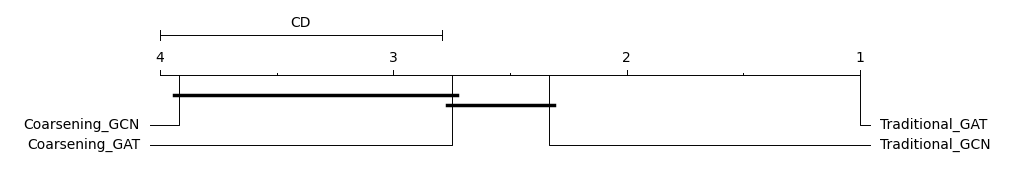

In [68]:
A = df_comp.values

friedmanchisquare(*A)

ranks = np.array([rankdata(-p) for p in A])
avg_ranks = np.mean(ranks, axis=0)

print('\n'.join('{} average rank: {}'.format(a, r) for a, r in zip(df_comp.columns, avg_ranks)))

cd = compute_CD(avg_ranks, n=len(df_comp), alpha='0.1', test='nemenyi')

# This method generates the plot.
graph_ranks(avg_ranks, names=df_comp.columns, cd=cd, width=10, textspace=1.5, reverse=True)

In [69]:
print(cd)

1.2076427426879792
